# Project: Bio-diversity Data Analysis from the National Park Services.

## Project Goals
The goal of this project is to analyze biodiversity data from the National Parks Services, with respect to the conservation status of various species observed in different national park locations.

**The Project Scope consists of:**
1. Explore and Clean the Data
2. Perform statistical Analysis on the Data
3. Visualize the Data
4. Seek to explore relations discovered from this analysis, with degrees of significance. 

## Questions to Answer
1. How are categories of species spread over the four parks?
2. How are individual species with unhealthy populations spread over the four parks?
3. What categories of species have the highest rates of unhealthy populations?
4. What is the variation of observations of individual species with unhealthy populations compared to their category mean?

## Definitions
Biodiversity refers to the variety of living species on Earth, including plants, animals, bacteria, and fungi.

## Data Sources
Both 'Observations.csv' and 'Species_info.csv' were provided by [Codecademy](https://www.codecademy.com).
**This data is fictional. It is modeled after real-world data for the purposes of practicing data analytics.**

## References
1. Biodiversity. Education. (n.d.). Retrieved April 17, 2023, from https://education.nationalgeographic.org/resource/biodiversity/ 

# Preparing the Data

## Import Statements & Dataframe Creation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display_html

%matplotlib inline

species = pd.read_csv('species_info.csv',encoding='utf-8')
observations = pd.read_csv('observations.csv', encoding='utf-8')

## Exploring Species

In exploring the species dataframe, we observe this about the data:
1. The count for the category, scientific_name, and common_names are all 5824. 
    - This implies there are no Nulls in these columns, meaning every scientific name has a corresponding common name and category.  
2. The count for conservation_status is only 191, and there are only 4 defined categories. This shows that Nan is being used to identify species not in a conservation status.
    - We will create a new conservation status called "Healthy Population", and populate the NaN values with this new status. 
3. The scientific_name count does not equal the unique count. This means scientific_names, which should be unique, are being repeated. 
    - This may be acceptable with common_names, as similar but unique species may be incorrectly identified as the same species by the common population. 
        - We group by scientific name with a Lambda function to display the number of instances each scientific name is repeated. 
    - After reviewing a sample of duplicate entries in scientific name, there is no value in keeping these duplicate entries. We will drop the duplicates in our data cleansing. 
4. We perform a value count of category and conservation status to see the distribution of these columns.
    - For conservation status, we see that the total count of all non healhy populations is less than 200, or under 3.5% of the total species count (including count of healthy populations). 
        - Because healthy populations are represented by Nan, we explicitly count this separately from the non-null values.
        - Once we clean the data, we will see the true distribution count and percentage of conservation status.
    - For category, we observe plants are over 80% of total species observed, with all animals consisting of the remaining 20%
        - Would need to further research to confirm if this 4:1 ratio is to be expected in a natural habitat, or implies bias in the data collection process. 

In [2]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [4]:
print(f"Unique Categories: {species.category.unique()}")
print()
print(f"Unique Conservation Status: {species.conservation_status.unique()}")

Unique Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

Unique Conservation Status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [5]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
df1 = species.category.value_counts().to_frame(name = '')
df2 = species.category.value_counts(normalize = True).to_frame(name = '').apply(lambda x: x * 100)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Species Category Value Count')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Species Category Value Count Percentage')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,
category,
Vascular Plant,4470
Bird,521
Nonvascular Plant,333
Mammal,214
Fish,127
Amphibian,80
Reptile,79
,
category,


In [7]:
print(f"Nan Value count for conservation status: {species.conservation_status.isna().sum()}")

Nan Value count for conservation status: 5633


In [8]:
species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [9]:
species.groupby("scientific_name").size().loc[lambda x: x > 1].sort_values()

scientific_name
Agrostis capillaris                 2
Panicum capillare                   2
Panicum miliaceum                   2
Panicum rigidulum var. rigidulum    2
Parietaria pensylvanica             2
                                   ..
Myotis lucifugus                    3
Columba livia                       3
Holcus lanatus                      3
Streptopelia decaocto               3
Canis lupus                         3
Length: 274, dtype: int64

In [10]:
df3 = species[species["scientific_name"] == "Myotis lucifugus"]
df4 = species[species["scientific_name"] == "Streptopelia decaocto"]

df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption("Myotis lucifugus Duplicates")
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption("Streptopelia decaocto Duplicates")

display_html(df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,category,scientific_name,common_names,conservation_status
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern
3042,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis, Little Brown Myotis",Species of Concern
4467,Mammal,Myotis lucifugus,Little Brown Myotis,Species of Concern
,category,scientific_name,common_names,conservation_status
3077,Bird,Streptopelia decaocto,Eurasian Collared-Dove,nan
3140,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Eurasian Collared-Dove",nan
4514,Bird,Streptopelia decaocto,Eurasian Collared Dove,nan


## Exploring Observations

In exploring the observations dataframe, we observe this about the data:
1. The scientific name unique entries of 5541 matches our species dataframe. 
    - We can join both dataframes on the scientific_name column
2. We see every column has the same non-null count of 23,296. 
    - This infers every observation is a complete entry (no null entries), consisting of both a park name and the scientific name.
3. We see the observation count per park is 5824 for all four parks exactly.
    - This implies a limit on data collection for the number of entries per park. 
        - It is possible that relevant data was not included due to this limit.
    - Each park has more entries than the total unique scientific names.
        - If every park had every unique species, that would equate to 22,164 observations at the maximum. 
        - When we group by scientific name over 4 entries, we see there are 274 duplicates to account for.
4. While the average of obervations per species is 142, the standard deviation is quite high at just about half the mean. 
    - Additionally, the min is 9 and the max is 321. This is quite a wide range.
        - Perhaps some species were simply more difficult to observe during the survey window. 
5. We observe duplicate/problematic data when we review the count of scientific name entries.
    - We see some species have up to 12 unique entries. The maximum should be 4, as each species can exist in all 4 parks. 
        - The best guess inference for this is that multiple volunteeers/workers were counting their observations. These observations were entered in separately, vs. being summed and entered as one entry. 
    - We will proceed to add the total entries for each species per each park when there are multiple entries.
        - We cannot simply drop duplicate entries, because that'll drop useful observation count data. Instead, we need to sum every duplicate scientific name and park name to find a total count for observations. 
    

In [11]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [12]:
observations.describe(include = 'all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [13]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [14]:
print(f"Unique Park Names: {observations.park_name.unique()}")

Unique Park Names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [15]:
observations.park_name.value_counts()

park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64

In [16]:
observations.groupby("scientific_name").size().loc[lambda x: x > 4].sort_values()

scientific_name
Agrostis capillaris                  8
Panicum capillare                    8
Panicum miliaceum                    8
Panicum rigidulum var. rigidulum     8
Parietaria pensylvanica              8
                                    ..
Myotis lucifugus                    12
Columba livia                       12
Holcus lanatus                      12
Streptopelia decaocto               12
Canis lupus                         12
Length: 274, dtype: int64

In [17]:
df5 = observations[observations["scientific_name"] == "Columba livia"]
df6 = observations[observations["scientific_name"] == "Streptopelia decaocto"]

df5_styler = df5.style.set_table_attributes("style='display:inline'").set_caption('Columba livia Duplicates')
df6_styler = df6.style.set_table_attributes("style='display:inline'").set_caption('Streptopelia decaocto Duplicates')

display_html(df5_styler._repr_html_()+df6_styler._repr_html_(), raw=True)

,scientific_name,park_name,observations
1865,Columba livia,Bryce National Park,135
2191,Columba livia,Yellowstone National Park,251
3255,Columba livia,Yosemite National Park,142
3441,Columba livia,Bryce National Park,96
6968,Columba livia,Bryce National Park,108
10468,Columba livia,Yosemite National Park,144
10688,Columba livia,Yellowstone National Park,232
11193,Columba livia,Yellowstone National Park,239
11859,Columba livia,Great Smoky Mountains National Park,44
12700,Columba livia,Great Smoky Mountains National Park,34


In [18]:
observations[observations["scientific_name"] == "Columba livia"].groupby(['park_name', 'scientific_name']).agg('sum')

,,observations
park_name,scientific_name,
Bryce National Park,Columba livia,339
Great Smoky Mountains National Park,Columba livia,169
Yellowstone National Park,Columba livia,722
Yosemite National Park,Columba livia,423


In [19]:
observations[observations["scientific_name"] == "Streptopelia decaocto"].groupby(['park_name', 'scientific_name']).agg('sum')

,,observations
park_name,scientific_name,
Bryce National Park,Streptopelia decaocto,301
Great Smoky Mountains National Park,Streptopelia decaocto,256
Yellowstone National Park,Streptopelia decaocto,771
Yosemite National Park,Streptopelia decaocto,457


## Cleaning Species

1. Create a 'Healthy Population' conservation status to replace Nan values.
2. Order the categories of conservation status to indicate ranking of conservation status, from most healthy to least healthy. 
    - 'Healthy Population' < 'Species of Concern' < 'In Recovery' < 'Threatened' < 'Endangered'
2. Remove duplicate entries in scientific_name. 
    - We have 5824 total entries consisting of 5541 unique entries.
    - This consolidation will remove 283 duplicate rows.

In [20]:
species.conservation_status.fillna("Healthy Population", inplace = True)

In [21]:
species.conservation_status = pd.Categorical(species.conservation_status, ["Healthy Population", 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered' ], ordered = True)

In [22]:
species.conservation_status.unique()

['Healthy Population', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
Categories (5, object): ['Healthy Population' < 'Species of Concern' < 'In Recovery' < 'Threatened' < 'Endangered']

In [23]:
species.drop_duplicates('scientific_name', inplace = True)

In [24]:
species.describe(include ='all')

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,5541
unique,7,5541,5229,5
top,Vascular Plant,Clethrionomys gapperi gapperi,Brachythecium Moss,Healthy Population
freq,4262,1,7,5363


In [25]:
df7 = species.conservation_status.value_counts().to_frame(name = '').sort_values(by = ['conservation_status'])
df8 = species.conservation_status.value_counts(normalize = True).to_frame(name = '').sort_values(by = ['conservation_status']).apply(lambda x: x * 100)

df7_styler = df7.style.set_table_attributes("style='display:inline'").set_caption('Conservation Status')
df8_styler = df8.style.set_table_attributes("style='display:inline'").set_caption('Conservation Status Percentage')

display_html(df7_styler._repr_html_()+df8_styler._repr_html_(), raw=True)

,
conservation_status,
Healthy Population,5363
Species of Concern,151
In Recovery,3
Threatened,9
Endangered,15
,
conservation_status,
Healthy Population,96.787583
Species of Concern,2.725140


## Cleaning Observations

1. Combine duplicate scientific_name and park_name rows while adding the observation count of each.
    1. Identify instances where scientific_name and park_name are the same.
    2. Sum the observations counts in each duplicate row to obtain a total count of observations.
    3. Write a unique entry row consisting of scientific_name, park_name, and observations (total).
    4. Delete the previous duplicate rows, so only the unique row remains. 

In [26]:
observations = observations.groupby(['scientific_name', 'park_name'], as_index = False).agg('sum')

In [27]:
observations.head(8)

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83
5,Abies concolor,Great Smoky Mountains National Park,101
6,Abies concolor,Yellowstone National Park,241
7,Abies concolor,Yosemite National Park,205


## Creating New Dataframes

1. observations_total_count
    1. From Observations: scientific_name and observations
    2. This dataframe shows the total observation count for each species, regardless of where the observation was located.
2. species_and_observations_total_count
    1. From both observations_total_count and species: merge on species_name
    2. Since species_name is a unique identifier for both dataframes, we can merge on this key.
    3. We use observations_total_count for a few reasons:
        1. We want the total observation count to compare against the conservation status for each species.
        2. The breakdown of where each observation was taken isn't relevant at this point. However, the original data has been preserved in the observations DataFrame for reference. 
        3. Using the observations DataFrame would result in every entry from the species DataFrame being represented four times (one for each park and observation count). This would make the data hard to analyze. 
    4. We also remove the common_names column from this DataFrame
        1. Since the species is more accurately reflected by the scientific name, this column is redundant.
        2. Additionally, there can be multiple common names per species name, which only adds to the confusion. 
        3. The common names is still preserved in the original species DataFrame for reference. 

In [28]:
observations_total_count = observations.groupby(['scientific_name'], as_index = False).agg('sum')
observations_total_count = observations_total_count[['scientific_name', 'observations']]
observations_total_count.columns = ['scientific_name', 'total_observations']
observations_total_count.head()

,scientific_name,total_observations
0,Abies bifolia,532
1,Abies concolor,630
2,Abies fraseri,518
3,Abietinella abietina,592
4,Abronia ammophila,523


In [29]:
species_and_observations_total_count = pd.merge(species, observations_total_count)
species_and_observations_total_count = species_and_observations[['scientific_name', 'category', 'conservation_status', 'total_observations']]

NameError: name 'species_and_observations' is not defined

In [ ]:
species_and_observations_total_count.head()

# Analyze the Data

## Relationship: Conservation Status & Species Category

1. Vascular and Nonvascular Plants are the least endangered. 
    1. They have Healthy Population counts for their individual species at over 98%.
    2. Species of Concern percent ranges from a half to over one order of magnitude less than their animal counterparts. 
2. Reptiles, Amphibians, and Fish sit in the middle of the set. 
    1. They have Healthy Population counts for their individual species in the low 90%.
    2. Reptiles are faring the best of the three, with 0% In Recovery, Threatened, or Endangered. 
    3. Amphibians and Fish seem to have similar metrics, with Fish having a higher Endangered percent. 
3. Mammals and Birds are the most endangered.
    1. Mammals and Birds have the lowest Healthy Population Count percent of ~ 80%, as well as the highest Species of Concern percent of ~ 13%.
    2. Mammals have the highest Endangered percent at ~ 3.4%, and have 0% In Recovery rate for their Endangered or Threatened populations.
4. Visualizing the data.
    1. We create a stacked bar chart showing the total percentage of each conservation status per category. 
        1. This chart highlights that healthy populations are the majority of the dataset. 
    2. We then remove healthy populations from the data, and create a new stacked bar chart showing the total percentage of each conservation status per category. 
        1. This chart highlights the distribution of only protected conservation statuses, relative to each other. 

In [ ]:
species_and_observations_total_count.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

In [ ]:
species_and_observations_total_count.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack().sum()

In [30]:
species_and_observations_total_count.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack().apply(lambda x: (x / x.sum()) * 100)\
    .rename( index = lambda n: n + ' %')

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Healthy Population %,91.139241,84.631148,92.0,82.954545,98.498498,93.589744,98.920695
Species of Concern %,5.063291,13.934426,3.2,12.500000,1.501502,6.410256,1.008916
In Recovery %,0.000000,0.614754,0.0,0.000000,0.000000,0.000000,0.000000
Threatened %,2.531646,0.000000,2.4,1.136364,0.000000,0.000000,0.046926
Endangered %,1.265823,0.819672,2.4,3.409091,0.000000,0.000000,0.023463


In [44]:
to_visualize = species_and_observations_total_count.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack().apply(lambda x: (x / x.sum()) * 100)\
    .rename( index = lambda n: n + ' %').swapaxes("index", "columns")

to_visualize

conservation_status,Healthy Population %,Species of Concern %,In Recovery %,Threatened %,Endangered %
category,,,,,
Amphibian,91.139241,5.063291,0.000000,2.531646,1.265823
Bird,84.631148,13.934426,0.614754,0.000000,0.819672
Fish,92.000000,3.200000,0.000000,2.400000,2.400000
Mammal,82.954545,12.500000,0.000000,1.136364,3.409091
Nonvascular Plant,98.498498,1.501502,0.000000,0.000000,0.000000
Reptile,93.589744,6.410256,0.000000,0.000000,0.000000
Vascular Plant,98.920695,1.008916,0.000000,0.046926,0.023463


Text(0, 0.5, 'Percentage of Species')

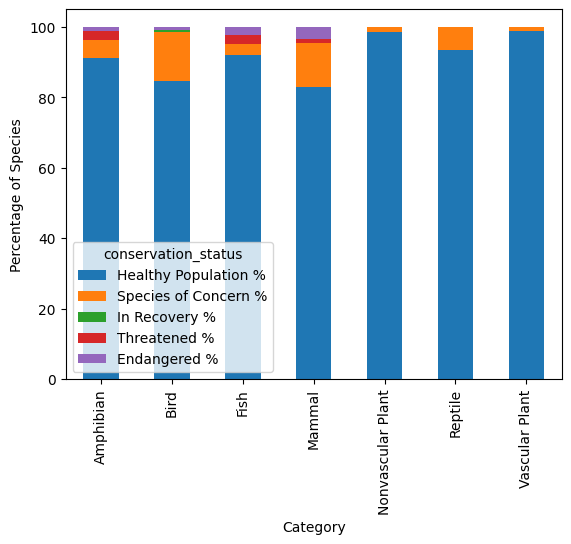

In [85]:
ax = to_visualize.plot(kind = 'bar', stacked = True)
ax.set_xlabel('Category')
ax.set_ylabel('Percentage of Species')

In [76]:
species_and_observation_protected_only = species_and_observations_total_count[species_and_observations_total_count.conservation_status != 'Healthy Population']

In [77]:
species_and_observation_protected_only.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack().apply(lambda x: (x / x.sum()) * 100)\
    .rename( index = lambda n: n + ' %')

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Healthy Population %,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
Species of Concern %,57.142857,90.666667,40.0,73.333333,100.0,100.0,93.478261
In Recovery %,0.000000,4.000000,0.0,0.000000,0.0,0.0,0.000000
Threatened %,28.571429,0.000000,30.0,6.666667,0.0,0.0,4.347826
Endangered %,14.285714,5.333333,30.0,20.000000,0.0,0.0,2.173913


In [82]:
to_visualize2 = species_and_observation_protected_only.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack().apply(lambda x: (x / x.sum()) * 100)\
    .rename( index = lambda n: n + ' %').swapaxes("index", "columns")
to_visualize2 = to_visualize2[['Species of Concern %', 'In Recovery %', 'Threatened %', 'Endangered %']]
to_visualize2

conservation_status,Species of Concern %,In Recovery %,Threatened %,Endangered %
category,,,,
Amphibian,57.142857,0.0,28.571429,14.285714
Bird,90.666667,4.0,0.000000,5.333333
Fish,40.000000,0.0,30.000000,30.000000
Mammal,73.333333,0.0,6.666667,20.000000
Nonvascular Plant,100.000000,0.0,0.000000,0.000000
Reptile,100.000000,0.0,0.000000,0.000000
Vascular Plant,93.478261,0.0,4.347826,2.173913


Text(0, 0.5, 'Percentage of Species')

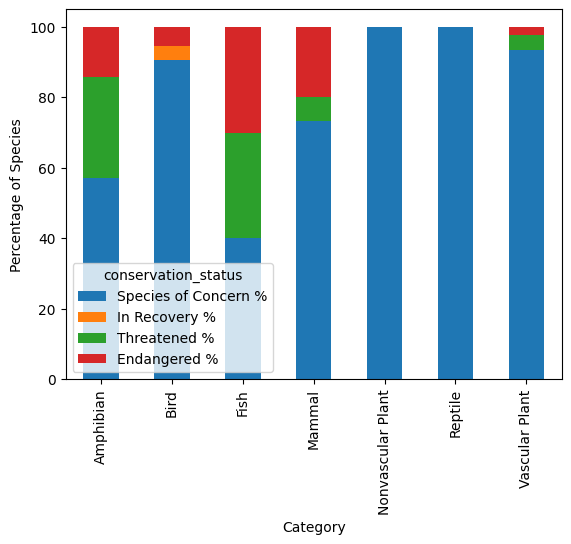

In [86]:
ax2 = to_visualize2.plot(kind = 'bar', stacked = True)
ax2.set_xlabel('Category')
ax2.set_ylabel('Percentage of Species')

## Statistical Significance